# Лобраторная работа №1

In [0]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#from google.colab import files

In [0]:
# remove after
#files.upload()


In [0]:
#!unzip /content/google-play-store-apps.zip -d /content/

In [0]:
#!pwd

# Очистка данных



Датасет состоит из следующих данных:
* App - Application name
* Category: Category the app belongs to
* Rating: Overall user rating of the app (as when scraped)
* Reviews: Number of user reviews for the app (as when scraped)
* Size: Size of the app (as when scraped)
* Installs: Number of user downloads/installs for the app (as when scraped)
* Type: Paid or Free
* Price: Price of the app (as when scraped)
* Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
* Genres: An app can belong to multiple genres (apart from its main * category). For eg, a musical family game will belong to Music, Game, Family genres.
* Last Updated: Date when the app was last updated on Play Store (as when scraped)
* Current Ver: Current version of the app available on Play Store (as when scraped)
* Android Ver: Min required Android version (as when scraped)

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plots

In [28]:
data  = pd.read_csv("googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
data.columns = data.columns.str.replace(' ', '_')

In [30]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [31]:
print("Shape of data (samples, features): ",data.shape)
print("Data Types: \n", data.dtypes.value_counts())

Shape of data (samples, features):  (10841, 13)
Data Types: 
 object     12
float64     1
dtype: int64


The data has 12 object and 1 numeric feature i.e. Rating.

Now Exploring each features individually

* Size
* Installs
* Reviews
* Rating
* Type
* Price
* Category
* Content Rating
* Genres
* Last Updated
* Current Version
* Android Version

# Size
посмотрим на частоту каждого элемента, чтобы получить некоторое представление о природе данных

In [32]:
data.Size.value_counts().head()
# ~ please remove head() to get a better understanding 

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
Name: Size, dtype: int64

Видно, что данные имеют метрические префиксы (кило и мега) вместе с другой строкой. Заменим k и M c их численными значениями, чтобы преобразовать значения в числовые.

In [33]:
data.Size=data.Size.str.replace('k','e+3')
data.Size=data.Size.str.replace('M','e+6')
data.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

Теперь в наборе есть два типа значений для `Size`.

1. экспоненциальные значения (то есть еще не преобразованы в строку)
2. Строки (которые не могут быть преобразованы в числовые)

Таким образом, указав категории 1 и 2 как логический массив temp, преобразуйте категорию 1 в числовой.

In [34]:
def is_convertable(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
    
temp=data.Size.apply(lambda x: is_convertable(x))
temp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

Проверяем уникальные (нечисловые значения) (~ temp) в Size.

In [35]:
data.Size[~temp].value_counts()

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

* Заменяем 'Varies with Device' на Nan и
* Преобразовываем 1000+ в 1000, чтобы сделать его числовым

In [0]:
data.Size=data.Size.replace('Varies with device',np.nan)
data.Size=data.Size.replace('1,000+',1000)

Преобразование очищенных данных 'Size' в числовой тип

In [0]:
data.Size=pd.to_numeric(data.Size)

Text(0, 0.5, 'Frequency')

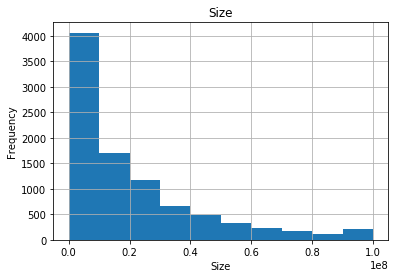

In [38]:
data.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

# Installs

Также проверяем на уникальные значения в 'Install'

In [39]:
data.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

Видно, что существует 22 уникальных значения, из которых:

* 1 равно 0,
* 1 - это Free (строка), которую мы здесь будем конвертировать в nan
* и остальные являются числовыми, но с '+' и ',', которые должны быть удалены, чтобы преобразовать их в числовой тип.

In [40]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.replace('Free',np.nan)
data.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

Проверяем, преобразованы ли данные в числовые

In [41]:
data.Installs.str.isnumeric().sum()

10840

Теперь в 'Installs', 1 образец не числовой из 10841, который является nan (преобразованный из Free в nan на предыдущем шаге)

In [0]:
data.Installs=pd.to_numeric(data.Installs)

Text(0, 0.5, 'Frequency')

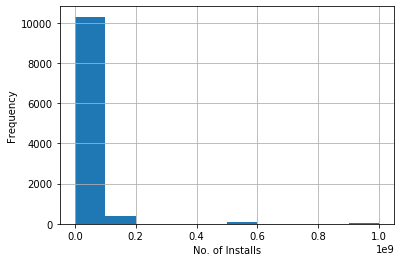

In [43]:
data.Installs=pd.to_numeric(data.Installs)
data.Installs.hist();
plt.xlabel('No. of Installs')
plt.ylabel('Frequency')

# Reviews
Проверям, все ли значения в числах отзывов (Reviews) являются числовые

In [44]:
data.Reviews.str.isnumeric().sum()

10840

Одно значение не числовое из 10841. Найдем его значение и идентификатор

In [45]:
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We could have converted it into interger like we did for Size but the data for this App looks different. It can be noticed that the entries are entered wrong (i.e. cell backwared). We could fix it by setting Category as nan and shifting all the values, but deleting the sample for now.

Можно преобразовать его в Interger, как как было сделано в Size, но данные для этого приложения выглядят иначе. Можно заметить, что записи введены неправильно (то есть с обратной стороны ячейки). Можно исправить это, установив Category как nan и сместив все значения, но удалив образец на данный момент.

In [0]:
data=data.drop(data.index[10472])

проверяем, удалена ли строка

In [47]:
data[10471:].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404000.0,100000.0,Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4100000.0,10000000.0,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [0]:
data.Reviews=data.Reviews.replace(data.Reviews[~data.Reviews.str.isnumeric()],np.nan)

Text(0, 0.5, 'Frequency')

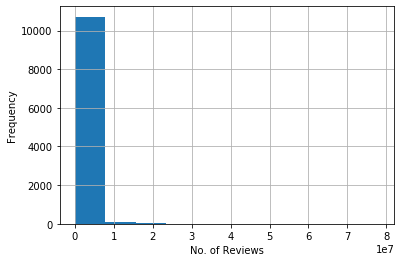

In [49]:
data.Reviews=pd.to_numeric(data.Reviews)
data.Reviews.hist();
plt.xlabel('No. of Reviews')
plt.ylabel('Frequency')

# Rating
Чтобы записи были правильными, нам нужно убедиться, что они попадают в диапазон от 1 до 5

In [50]:
print("Range: ", data.Rating.min(),"-",data.Rating.max())

Range:  1.0 - 5.0


Проверяем тип данных, чтобы увидеть, нужно ли их преобразовывать в числовые

In [51]:
data.Rating.dtype

dtype('float64')

Data is already numeric, now checking if the data has null values

In [52]:
print(data.Rating.isna().sum(),"null values out of", len(data.Rating))

1474 null values out of 10840


Text(0, 0.5, 'Frequency')

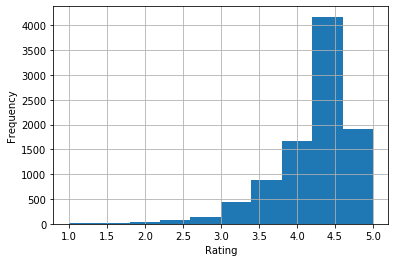

In [53]:
data.Rating.hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Type
Также проверяем

In [54]:
data.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

# Price
Проверка на уникальные значения цены, отклонения

Есть только два типа, бесплатные и платные. Здесь нет нежелательных данных.

In [55]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

В наборе имеются данные со знаком $, который должен быть удален, чтобы корректно преобразовать их в числовые

In [0]:
data.Price=data.Price.apply(lambda x: x.strip('$'))

Text(0, 0.5, 'Frequency')

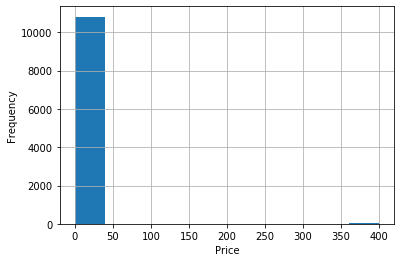

In [57]:
data.Price=pd.to_numeric(data.Price)
data.Price.hist();
plt.xlabel('Price')
plt.ylabel('Frequency')

In [58]:
temp=data.Price.apply(lambda x: True if x>350 else False)
data[temp].head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


# Category


In [59]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Нет повторений или 'ложных' данных

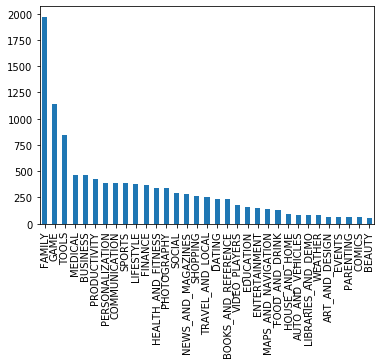

In [60]:
data.Category.value_counts().plot(kind='bar')

# Content Rating

In [61]:
data.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

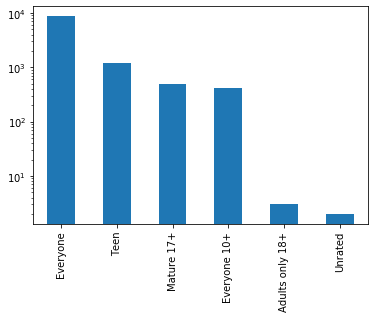

In [62]:
data.Content_Rating.value_counts().plot(kind='bar')
plt.yscale('log')

# Genres
Проверка уникальных значений, отклонений или повторений в данных

In [63]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

The data is in the format __Category;Subcategory__. Lets divide the data into two columns, one as primary category and the other as secondary, using ; as separator.

Данные в формате __ Категория; Подкатегория. Имеет смысл разделить данные на два столбца, один как первичная категория, а другой как вторичная. используем ";" в качестве разделителя.

In [64]:
sep = ';'
rest = data.Genres.apply(lambda x: x.split(sep)[0])
data['Pri_Genres']=rest
data.Pri_Genres.head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Pri_Genres, dtype: object

In [65]:
rest = data.Genres.apply(lambda x: x.split(sep)[-1])
rest.unique()
data['Sec_Genres']=rest
data.Sec_Genres.head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Sec_Genres, dtype: object

In [66]:
grouped = data.groupby(['Pri_Genres','Sec_Genres'])
grouped.size().head(15)

Pri_Genres       Sec_Genres        
Action           Action                365
                 Action & Adventure     17
Adventure        Action & Adventure     13
                 Adventure              75
                 Brain Games             1
                 Education               2
Arcade           Action & Adventure     16
                 Arcade                220
                 Pretend Play            1
Art & Design     Action & Adventure      2
                 Art & Design           58
                 Creativity              7
                 Pretend Play            2
Auto & Vehicles  Auto & Vehicles        85
Beauty           Beauty                 53
dtype: int64

Создаем две таблиц для лучшего понимания взаимосвязи между первичной и вторичной категориями жанров

In [67]:
twowaytable = pd.crosstab(index=data["Pri_Genres"],columns=data["Sec_Genres"])
twowaytable.head()

Sec_Genres,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,Business,Card,Casino,Casual,Comics,Communication,Creativity,Dating,Education,Educational,Entertainment,Events,Finance,Food & Drink,Health & Fitness,House & Home,Libraries & Demo,Lifestyle,Maps & Navigation,Medical,Music,Music & Video,News & Magazines,Parenting,Personalization,Photography,Pretend Play,Productivity,Puzzle,Racing,Role Playing,Shopping,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Pri_Genres,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,365,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Adventure,0,13,75,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arcade,0,16,0,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Art & Design,0,2,0,0,58,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Auto & Vehicles,0,0,0,0,0,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


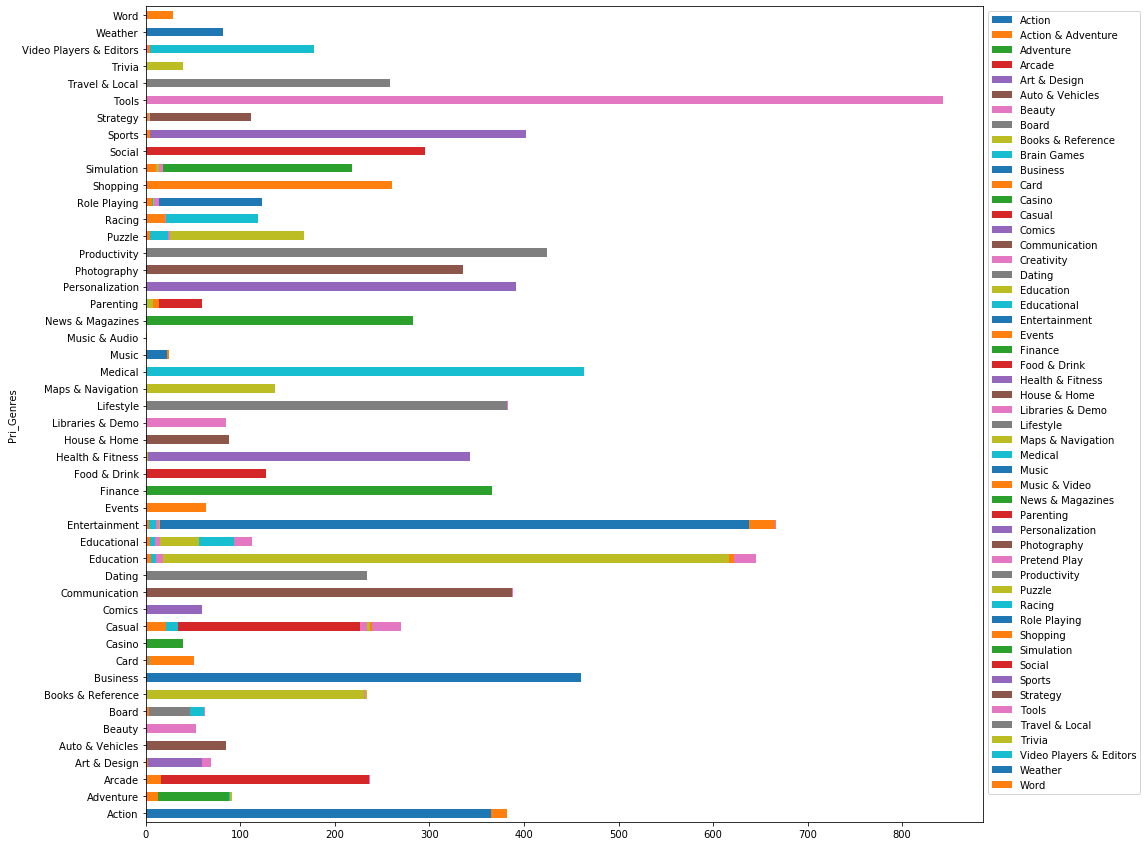

In [68]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))

# Last Updated


In [69]:
data.Last_Updated.head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

Преобразовываем данные из формат строки в дату / время для дальнейшей обработки

In [70]:
from datetime import datetime,date
temp=pd.to_datetime(data.Last_Updated)
temp.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last_Updated, dtype: datetime64[ns]

Можно получить количество дней, если взять разницу между последней обновленной датой и сегодняшним днем, чтобы упростить данные для дальнейшей обработки.

In [71]:
data['Last_Updated_Days'] = temp.apply(lambda x:date.today()-datetime.date(x))
data.Last_Updated_Days.head()

0   715 days
1   707 days
2   509 days
3   563 days
4   551 days
Name: Last_Updated_Days, dtype: timedelta64[ns]

# Android Version


In [72]:
data.Android_Ver.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Большинство значений имеют верхнее и нижнее значения (дииапазон), что позволяет разделить их на две новые функции __Version begin и end__, которые могут пригодиться при дальнейшей обработке данных

In [0]:
data['Version_begin']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[0].split(' - ')[0])
data.Version_begin=data.Version_begin.replace('4.4W','4.4')
data['Version_end']=data.Android_Ver.apply(lambda x:str(x).split(' and ')[-1].split(' - ')[-1])

In [74]:
data.Version_begin.unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1',
       'nan', '1.0'], dtype=object)

Представление категориальных данных в виде двухсторонней таблицы и представление их в виде столбцов с накоплением для лучшего понимания

In [75]:
twowaytable = pd.crosstab(index=data.Version_begin,columns=data.Version_end)
twowaytable.head()

Version_end,6.0,7.1.1,8.0,Varies with device,nan,up
Version_begin,,,,,,
1.0,0,0,0,0,0,2
1.5,0,0,0,0,0,20
1.6,0,0,0,0,0,116
2.0,0,0,0,0,0,32
2.0.1,0,0,0,0,0,7


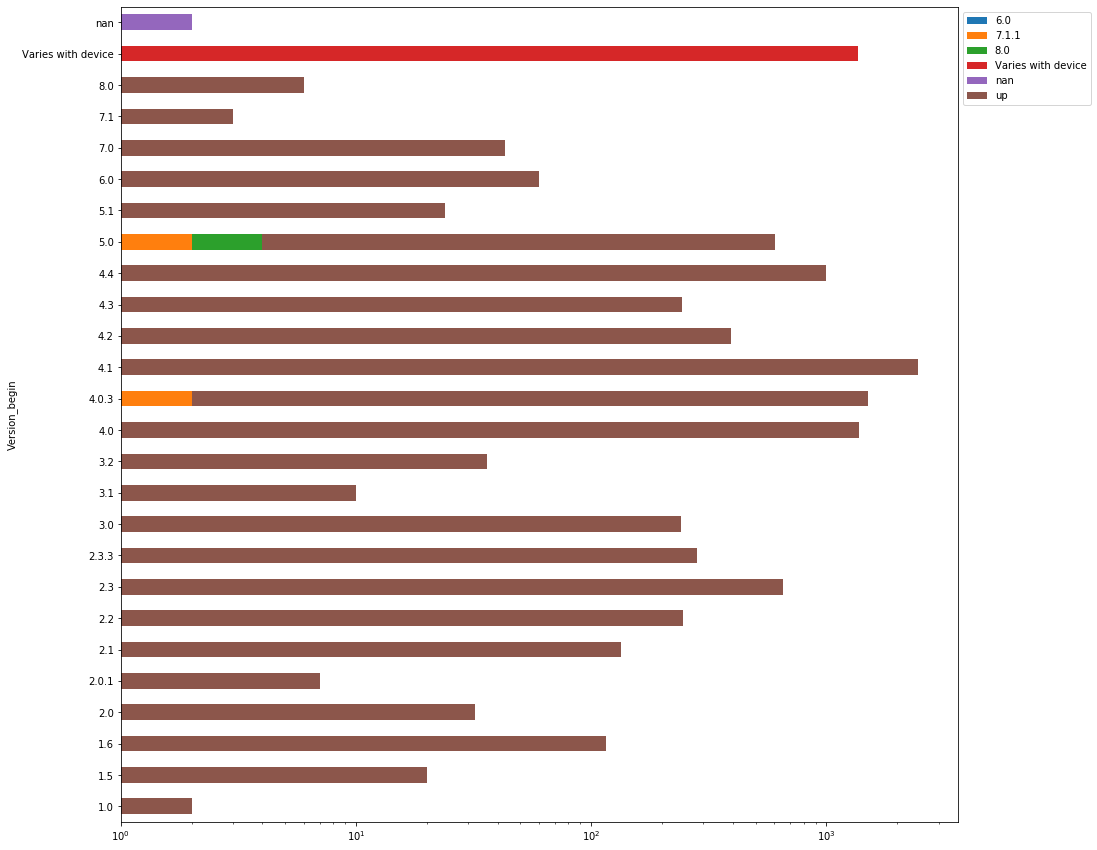

In [76]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')

In [77]:
data.Version_end.unique()

array(['up', 'Varies with device', '7.1.1', '8.0', 'nan', '6.0'],
      dtype=object)

# Current Version

In [78]:
data.Current_Ver.value_counts().head(6)

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
1.3                    145
Name: Current_Ver, dtype: int64

Прееобразуем все версии в формате __format number.number__, чтобы упростить данные, а также проверить, имеют ли данные нулевые значения. Кроме того, не преобразовываем value_counts в nan из-за его высокой частоты.

In [79]:
data.Current_Ver.isna().sum()

8

In [0]:
import re
temp=data.Current_Ver.replace(np.nan,'Varies with device')
temp=temp.apply(lambda x: 'Varies with device' if x=='Varies with device'  else  re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0] )

In [81]:
temp.unique()

array(['1.0', '2.0', '1.2', 'Varies with device', '1.1', '6.1', '2.9',
       '2.8', '3.8', '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7',
       '1.6', '2.1', '1.3', '1', '1.4', '3.0', '1.7', '2.5', '2.4', '1.9',
       '0.2', '4.4', '2.3', '8.3', '3.2', '4.6', '5.4', '8.0', '3.3',
       '9.1', '5.0', '9.0', '7.0', '3.9', '3.4', '9.7', '4.9', '5.2',
       '3.5', '7.3', '5.1', '4.1', '9', '0.9', '6.4', '3.7', '2.6', '4.3',
       '6.3', '4.7', '4.2', '1.8', '3', '9.8', '2', '4', '', '6', '7.5',
       '9.9', '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '8.1',
       '6.6', '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '5.7', '8.5', '0',
       '8.4', '6.8', '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '8.8',
       '7.4', '9.6', '8', '9.4', '5', '0.7', '0.5', '7', '7.6', '0.6',
       '8.9', '6.9', '9.3', '9.2', '8.6', '9.5', '0.8', '0.4', '0.3'],
      dtype=object)

Сохраняем обновленные значения текущей версии в виде нового столбца

In [0]:
data['Current_Ver_updated']=temp

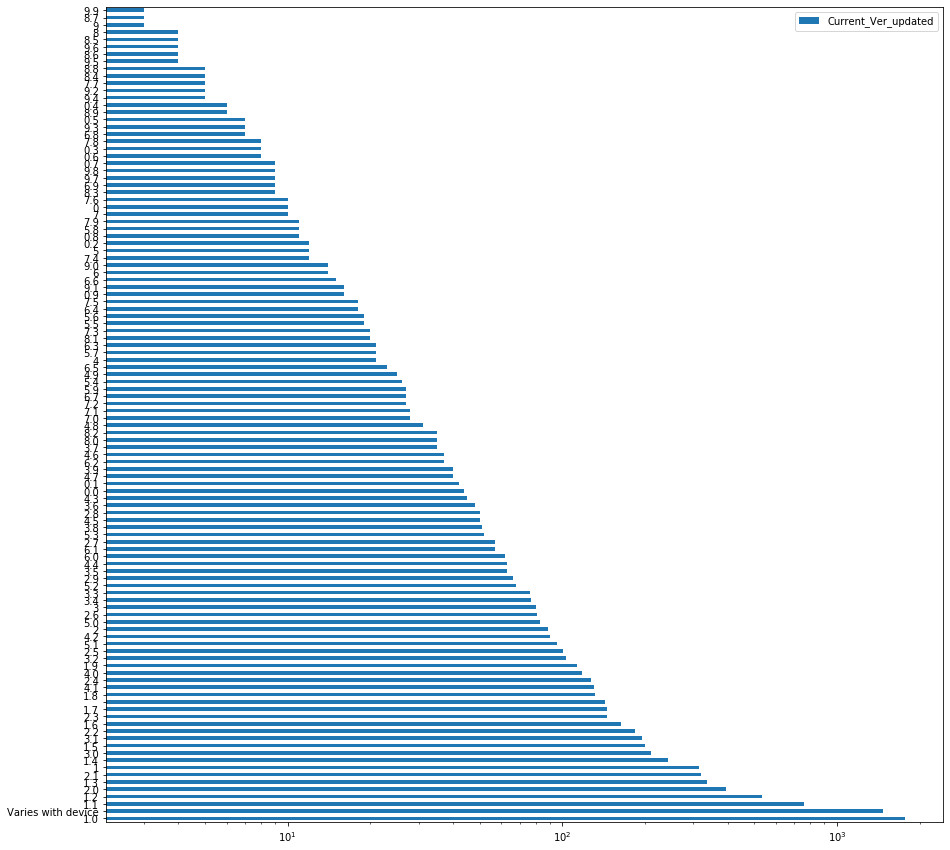

In [83]:
data.Current_Ver_updated.value_counts().plot(kind="barh", figsize=(15,15));
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fb521bf28>,
      dtype=object)

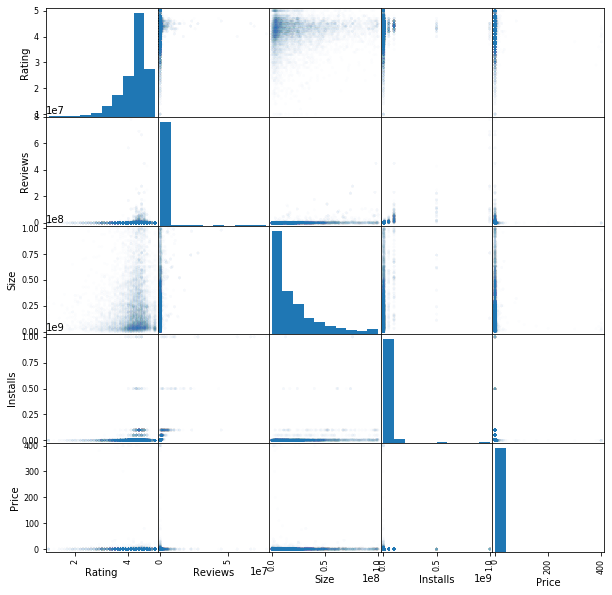

In [84]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


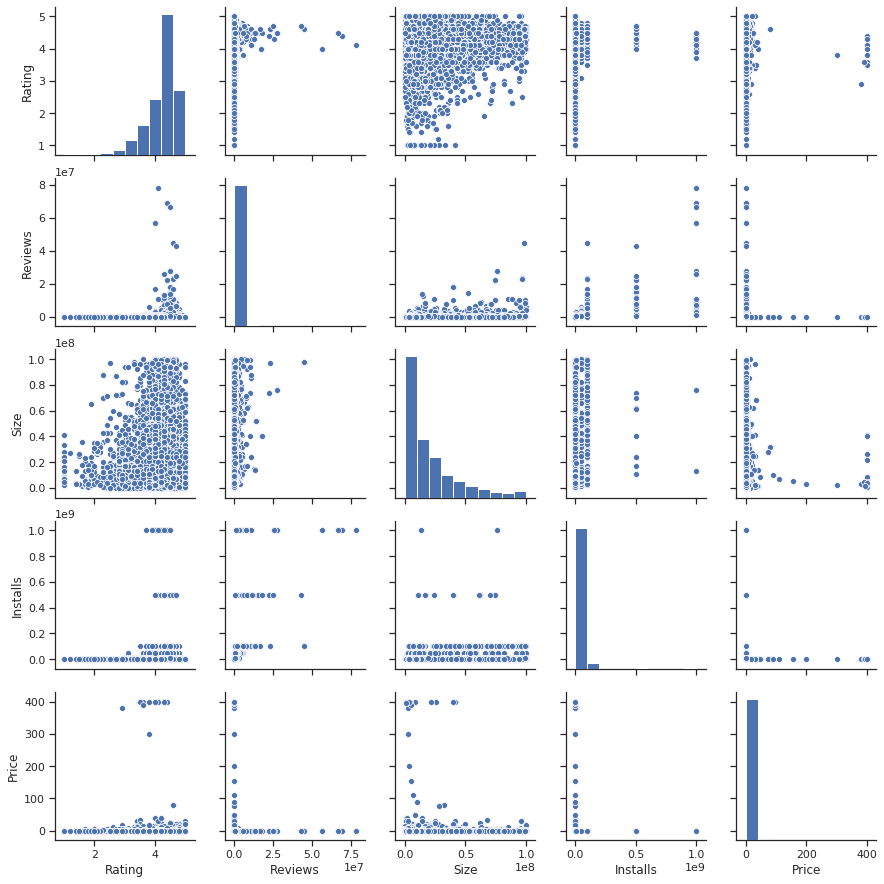

In [85]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(data)
pass

In [86]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Pri_Genres', 'Sec_Genres', 'Last_Updated_Days',
       'Version_begin', 'Version_end', 'Current_Ver_updated'],
      dtype='object')

In [87]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,0.083734,0.051355,-0.021903
Reviews,0.068141,1.000000,0.238215,0.643122,-0.009667
Size,0.083734,0.238215,1.000000,0.164787,-0.023006
Installs,0.051355,0.643122,0.164787,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.023006,-0.011689,1.000000


### просмотр данных

In [88]:
data.describe(include = ['object'])

,App,Category,Type,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Pri_Genres,Sec_Genres,Version_begin,Version_end,Current_Ver_updated
count,10840,10840,10839,10840,10840,10840,10832,10838,10840,10840,10840,10840,10840
unique,9659,33,2,6,119,1377,2831,33,48,52,26,6,112
top,ROBLOX,FAMILY,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up,Tools,Tools,4.1,up,1.0
freq,9,1972,10039,8714,842,326,1459,2451,843,842,2452,9467,1767


In [89]:
data.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Pri_Genres,Sec_Genres,Last_Updated_Days,Version_begin,Version_end,Current_Ver_updated
count,10840,10840,9366.000000,1.084000e+04,9.145000e+03,1.084000e+04,10839,10840.000000,10840,10840,10840,10832,10838,10840,10840,10840,10840,10840,10840
unique,9659,33,NaN,NaN,NaN,NaN,2,NaN,6,119,1377,2831,33,48,52,NaN,26,6,112
top,ROBLOX,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up,Tools,Tools,NaN,4.1,up,1.0
freq,9,1972,NaN,NaN,NaN,NaN,10039,NaN,8714,842,326,1459,2451,843,842,NaN,2452,9467,1767
mean,NaN,NaN,4.191757,4.441529e+05,2.151653e+07,1.546434e+07,NaN,1.027368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,761 days 17:16:57.564575,NaN,NaN,NaN
std,NaN,NaN,0.515219,2.927761e+06,2.258875e+07,8.502936e+07,NaN,15.949703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394 days 14:39:49.498440,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502 days 00:00:00,NaN,NaN,NaN
25%,NaN,NaN,4.000000,3.800000e+01,4.900000e+06,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521 days 00:00:00,NaN,NaN,NaN
50%,NaN,NaN,4.300000,2.094000e+03,1.300000e+07,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578 days 00:00:00,NaN,NaN,NaN
75%,NaN,NaN,4.500000,5.477550e+04,3.000000e+07,5.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,824 days 00:00:00,NaN,NaN,NaN


In [90]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['App', 'Category', 'Type', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver', 'Pri_Genres', 'Sec_Genres', 'Version_begin', 'Version_end', 'Current_Ver_updated']
['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last_Updated_Days']


In [91]:
for c in categorical_columns:
    print(c, data[c].unique())

App ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Type ['Free' 'Paid' nan]
Content_Rating ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
Genres ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Busine

# Обрабатываем пропущенные значения
Если данные содержат пропущенные значения, то имеется две простые альтернативы:

* удалить столбцы с такими значениями (data = data.dropna(axis = 1)),
* удалить строки с такими значениями (data = data.dropna(axis = 0)).
После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением. Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [92]:
data.median(axis = 0)

Rating             4.3
Reviews         2094.0
Size        13000000.0
Installs      100000.0
Price              0.0
dtype: float64

In [0]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [94]:
data[numerical_columns].count(axis = 0)

Rating               10840
Reviews              10840
Size                 10840
Installs             10840
Price                10840
Last_Updated_Days    10840
dtype: int64

In [95]:
data[categorical_columns].count(axis = 0)

App                    10840
Category               10840
Type                   10839
Content_Rating         10840
Genres                 10840
Last_Updated           10840
Current_Ver            10832
Android_Ver            10838
Pri_Genres             10840
Sec_Genres             10840
Version_begin          10840
Version_end            10840
Current_Ver_updated    10840
dtype: int64

In [96]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Pri_Genres', 'Sec_Genres', 'Last_Updated_Days',
       'Version_begin', 'Version_end', 'Current_Ver_updated'],
      dtype='object')

In [97]:
data.describe(include = [object])

,App,Category,Type,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Pri_Genres,Sec_Genres,Version_begin,Version_end,Current_Ver_updated
count,10840,10840,10839,10840,10840,10840,10832,10838,10840,10840,10840,10840,10840
unique,9659,33,2,6,119,1377,2831,33,48,52,26,6,112
top,ROBLOX,FAMILY,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up,Tools,Tools,4.1,up,1.0
freq,9,1972,10039,8714,842,326,1459,2451,843,842,2452,9467,1767


In [0]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [99]:
data.describe(include = [object])

,App,Category,Type,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Pri_Genres,Sec_Genres,Version_begin,Version_end,Current_Ver_updated
count,10840,10840,10840,10840,10840,10840,10840,10840,10840,10840,10840,10840,10840
unique,9659,33,2,6,119,1377,2831,33,48,52,26,6,112
top,ROBLOX,FAMILY,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up,Tools,Tools,4.1,up,1.0
freq,9,1972,10040,8714,842,326,1467,2453,843,842,2452,9467,1767


# Векторизация
Нужно что-то сделать с категориальными (номинальными) признаками

In [100]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Type'] ['App', 'Category', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver', 'Pri_Genres', 'Sec_Genres', 'Version_begin', 'Version_end', 'Current_Ver_updated']


In [101]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [102]:
data.at[data['Type'] == 'Free', 'Type'] = 0
data.at[data['Type'] == 'Paid', 'Type'] = 1
data['Type'].describe()

count    10840.000000
mean         0.073801
std          0.261458
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Type, dtype: float64

К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Например, в нашей задаче признак race принимает 5 различных значений:

In [103]:
def show_cat_uniqs(nonbinary_columns):
  for column_nam in nonbinary_columns:
    print(column_nam)
    print(data[column_nam].unique())
show_cat_uniqs(nonbinary_columns)

App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Content_Rating
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
Genres
['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Crea

Такую векторизацию осуществляет в pandas метод `get_dummies`:

In [104]:
data[nonbinary_columns].describe()

,App,Category,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Pri_Genres,Sec_Genres,Version_begin,Version_end,Current_Ver_updated
count,10840,10840,10840,10840,10840,10840,10840,10840,10840,10840,10840,10840
unique,9659,33,6,119,1377,2831,33,48,52,26,6,112
top,ROBLOX,FAMILY,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up,Tools,Tools,4.1,up,1.0
freq,9,1972,8714,842,326,1467,2453,843,842,2452,9467,1767


In [105]:
data['Android_Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [106]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['App_"i DT" Fútbol. Todos Somos Técnicos.',
       'App_+Download 4 Instagram Twitter', 'App_- Free Comics - Comic Apps',
       'App_.R', 'App_/u/app', 'App_058.ba', 'App_1. FC Köln App',
       'App_10 Best Foods for You', 'App_10 Minutes a Day Times Tables',
       'App_10 WPM Amateur ham radio CW Morse code trainer',
       ...
       'Current_Ver_updated_9.1', 'Current_Ver_updated_9.2',
       'Current_Ver_updated_9.3', 'Current_Ver_updated_9.4',
       'Current_Ver_updated_9.5', 'Current_Ver_updated_9.6',
       'Current_Ver_updated_9.7', 'Current_Ver_updated_9.8',
       'Current_Ver_updated_9.9', 'Current_Ver_updated_Varies with device'],
      dtype='object', length=14302)


In [107]:
len(data_nonbinary.columns)

14302

Есть параметры которые не представляют для анализа в данной задачи большое значение, но при этом имееют огормное количество больших уникальных значений.
При векторизации соответсвенно количесвто вырастает до непозволительно высокого значения.
Genres, т.к. из неё получали колонки Pri_Genres',
 'Sec_Genres'
 
  'Version_begin','Version_end', получаются из Andoird_Ver
Попробуем простым удалением данных колонок решить проблему размерности. Удаляемые колонки: 

Last_Updated, Genres, Current_Ver, Android_Ver, Version_begin, Version_end, Current_Ver_updated, App
(App значения выбираются только по одному уникальному значению)

In [0]:
deleted_columns = ['App', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver', 'Version_begin', 'Version_end', 'Current_Ver_updated']
data = data.drop(deleted_columns, axis=1)


In [109]:
new_nonbinary_columns = [columns for columns in nonbinary_columns if columns not in deleted_columns]
new_nonbinary_columns

['Category', 'Content_Rating', 'Pri_Genres', 'Sec_Genres']

In [0]:
# new_data.describe()

In [111]:
data[new_nonbinary_columns].describe()

,Category,Content_Rating,Pri_Genres,Sec_Genres
count,10840,10840,10840,10840
unique,33,6,48,52
top,FAMILY,Everyone,Tools,Tools
freq,1972,8714,843,842


Теперь можно выполнить вектаризацию

In [112]:
data_nonbinary = pd.get_dummies(data[new_nonbinary_columns])
print(data_nonbinary.columns)

Index(['Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT',
       ...
       'Sec_Genres_Simulation', 'Sec_Genres_Social', 'Sec_Genres_Sports',
       'Sec_Genres_Strategy', 'Sec_Genres_Tools', 'Sec_Genres_Travel & Local',
       'Sec_Genres_Trivia', 'Sec_Genres_Video Players & Editors',
       'Sec_Genres_Weather', 'Sec_Genres_Word'],
      dtype='object', length=139)


In [113]:
len(data_nonbinary.columns)

139

# Нормализация количественных признаков
Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [114]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Rating,Reviews,Size,Installs,Price,Last_Updated_Days
count,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000,10840
mean,4.206476,4.441529e+05,2.018484e+07,1.546434e+07,1.027368,761 days 17:16:57.564575
std,0.480342,2.927761e+06,2.097683e+07,8.502936e+07,15.949703,394 days 14:39:49.498440
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000,502 days 00:00:00
25%,4.100000,3.800000e+01,5.900000e+06,1.000000e+03,0.000000,521 days 00:00:00
50%,4.300000,2.094000e+03,1.300000e+07,1.000000e+05,0.000000,578 days 00:00:00
75%,4.500000,5.477550e+04,2.600000e+07,5.000000e+06,0.000000,824 days 00:00:00
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000,3503 days 00:00:00


In [115]:
data_numerical['Last_Updated_Days'].dtype

dtype('<m8[ns]')

In [116]:
data_numerical['Last_Updated_Days'] = pd.to_numeric(data_numerical['Last_Updated_Days'].dt.days, downcast='integer')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
data_numerical['Last_Updated_Days'].dtype

dtype('int16')

In [118]:
data_numerical.describe()

,Rating,Reviews,Size,Installs,Price,Last_Updated_Days
count,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000,10840.000000
mean,4.206476,4.441529e+05,2.018484e+07,1.546434e+07,1.027368,761.720111
std,0.480342,2.927761e+06,2.097683e+07,8.502936e+07,15.949703,394.610990
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000,502.000000
25%,4.100000,3.800000e+01,5.900000e+06,1.000000e+03,0.000000,521.000000
50%,4.300000,2.094000e+03,1.300000e+07,1.000000e+05,0.000000,578.000000
75%,4.500000,5.477550e+04,2.600000e+07,5.000000e+06,0.000000,824.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000,3503.000000


In [0]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [120]:
data_numerical.describe()

,Rating,Reviews,Size,Installs,Price,Last_Updated_Days
count,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04
mean,-2.917587e-13,-6.307995e-16,3.796823e-16,-1.756563e-15,2.138511e-16,-9.988935e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.675402e+00,-1.517040e-01,-9.618393e-01,-1.818706e-01,-6.441299e-02,-6.581675e-01
25%,-2.216671e-01,-1.516910e-01,-6.809818e-01,-1.818588e-01,-6.441299e-02,-6.100188e-01
50%,1.947029e-01,-1.509887e-01,-3.425131e-01,-1.806945e-01,-6.441299e-02,-4.655727e-01
75%,6.110729e-01,-1.329950e-01,2.772183e-01,-1.230674e-01,-6.441299e-02,1.578260e-01
max,1.651998e+00,2.654389e+01,3.804920e+00,1.157877e+01,2.501442e+01,6.946791e+00



# Соединяем все в одну таблицу

In [121]:
data_numerical.head()

,Rating,Reviews,Size,Installs,Price,Last_Updated_Days
0,-0.221667,-0.151650,-0.056483,-0.181753,-0.064413,-0.118395
1,-0.638037,-0.151374,-0.294841,-0.175990,-0.064413,-0.138668
2,1.027443,-0.121814,-0.547501,-0.123067,-0.064413,-0.640428
3,0.611073,-0.078049,0.229547,0.406162,-0.064413,-0.503585
4,0.194703,-0.151374,-0.828764,-0.180695,-0.064413,-0.533995


In [122]:
data_nonbinary.head()

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated,Pri_Genres_Action,...,Sec_Genres_Casino,Sec_Genres_Casual,Sec_Genres_Comics,Sec_Genres_Communication,Sec_Genres_Creativity,Sec_Genres_Dating,Sec_Genres_Education,Sec_Genres_Educational,Sec_Genres_Entertainment,Sec_Genres_Events,Sec_Genres_Finance,Sec_Genres_Food & Drink,Sec_Genres_Health & Fitness,Sec_Genres_House & Home,Sec_Genres_Libraries & Demo,Sec_Genres_Lifestyle,Sec_Genres_Maps & Navigation,Sec_Genres_Medical,Sec_Genres_Music,Sec_Genres_Music & Video,Sec_Genres_News & Magazines,Sec_Genres_Parenting,Sec_Genres_Personalization,Sec_Genres_Photography,Sec_Genres_Pretend Play,Sec_Genres_Productivity,Sec_Genres_Puzzle,Sec_Genres_Racing,Sec_Genres_Role Playing,Sec_Genres_Shopping,Sec_Genres_Simulation,Sec_Genres_Social,Sec_Genres_Sports,Sec_Genres_Strategy,Sec_Genres_Tools,Sec_Genres_Travel & Local,Sec_Genres_Trivia,Sec_Genres_Video Players & Editors,Sec_Genres_Weather,Sec_Genres_Word
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
data[binary_columns].head()

,Type
0,0
1,0
2,0
3,0
4,0


In [124]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(10840, 146)


In [125]:
data.describe()

,Rating,Reviews,Size,Installs,Price,Last_Updated_Days,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content_Rating_Adults only 18+,...,Sec_Genres_Casual,Sec_Genres_Comics,Sec_Genres_Communication,Sec_Genres_Creativity,Sec_Genres_Dating,Sec_Genres_Education,Sec_Genres_Educational,Sec_Genres_Entertainment,Sec_Genres_Events,Sec_Genres_Finance,Sec_Genres_Food & Drink,Sec_Genres_Health & Fitness,Sec_Genres_House & Home,Sec_Genres_Libraries & Demo,Sec_Genres_Lifestyle,Sec_Genres_Maps & Navigation,Sec_Genres_Medical,Sec_Genres_Music,Sec_Genres_Music & Video,Sec_Genres_News & Magazines,Sec_Genres_Parenting,Sec_Genres_Personalization,Sec_Genres_Photography,Sec_Genres_Pretend Play,Sec_Genres_Productivity,Sec_Genres_Puzzle,Sec_Genres_Racing,Sec_Genres_Role Playing,Sec_Genres_Shopping,Sec_Genres_Simulation,Sec_Genres_Social,Sec_Genres_Sports,Sec_Genres_Strategy,Sec_Genres_Tools,Sec_Genres_Travel & Local,Sec_Genres_Trivia,Sec_Genres_Video Players & Editors,Sec_Genres_Weather,Sec_Genres_Word,Type
count,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,...,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000
mean,-2.917587e-13,-6.307995e-16,3.796823e-16,-1.756563e-15,2.138511e-16,-9.988935e-16,0.005996,0.007841,0.004889,0.021310,0.042435,0.005535,0.035701,0.021587,0.014391,0.013745,0.005904,0.181919,0.033764,0.011716,0.105535,0.031458,0.008118,0.007841,0.035240,0.012638,0.042712,0.026107,0.005535,0.036162,0.030904,0.039114,0.023985,0.027214,0.035424,0.077768,0.023801,0.016144,0.007565,0.000277,...,0.017804,0.005443,0.035701,0.003413,0.021587,0.061347,0.003413,0.057472,0.005904,0.033764,0.011716,0.031458,0.008118,0.007841,0.035148,0.012638,0.042712,0.002030,0.004336,0.026107,0.004244,0.036162,0.030904,0.008303,0.039114,0.012915,0.009041,0.010055,0.023985,0.018450,0.027214,0.036716,0.009871,0.077675,0.023708,0.003506,0.015959,0.007565,0.002675,0.073801
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.077207,0.088207,0.069756,0.144422,0.201590,0.074195,0.185552,0.145336,0.119102,0.116438,0.076614,0.385795,0.180629,0.107609,0.307256,0.174559,0.089738,0.088207,0.184394,0.111713,0.202217,0.159461,0.074195,0.186703,0.173066,0.193876,0.153010,0.162714,0.184858,0.267818,0.152435,0.126035,0.086649,0.016634,...,0.132246,0.073578,0.185552,0.058326,0.145336,0.239977,0.058326,0.232754,0.076614,0.180629,0.107609,0.174559,0.089738,0.088207,0.184161,0.111713,0.202217,0.04500

# X и y

In [126]:
import re
y_columns = data.columns

r = re.compile("Category_.*")
y_columns = list(filter(r.match, y_columns))
for col in y_columns:
  print(col)

Category_ART_AND_DESIGN
Category_AUTO_AND_VEHICLES
Category_BEAUTY
Category_BOOKS_AND_REFERENCE
Category_BUSINESS
Category_COMICS
Category_COMMUNICATION
Category_DATING
Category_EDUCATION
Category_ENTERTAINMENT
Category_EVENTS
Category_FAMILY
Category_FINANCE
Category_FOOD_AND_DRINK
Category_GAME
Category_HEALTH_AND_FITNESS
Category_HOUSE_AND_HOME
Category_LIBRARIES_AND_DEMO
Category_LIFESTYLE
Category_MAPS_AND_NAVIGATION
Category_MEDICAL
Category_NEWS_AND_MAGAZINES
Category_PARENTING
Category_PERSONALIZATION
Category_PHOTOGRAPHY
Category_PRODUCTIVITY
Category_SHOPPING
Category_SOCIAL
Category_SPORTS
Category_TOOLS
Category_TRAVEL_AND_LOCAL
Category_VIDEO_PLAYERS
Category_WEATHER


In [0]:
#experiment_data.head()
X = data.drop(y_columns, axis = 1) # выбрасываем столбецы y_columns
y = data[y_columns]
feature_names = X.columns

In [128]:
feature_names

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last_Updated_Days',
       'Content_Rating_Adults only 18+', 'Content_Rating_Everyone',
       'Content_Rating_Everyone 10+', 'Content_Rating_Mature 17+',
       ...
       'Sec_Genres_Social', 'Sec_Genres_Sports', 'Sec_Genres_Strategy',
       'Sec_Genres_Tools', 'Sec_Genres_Travel & Local', 'Sec_Genres_Trivia',
       'Sec_Genres_Video Players & Editors', 'Sec_Genres_Weather',
       'Sec_Genres_Word', 'Type'],
      dtype='object', length=113)

In [0]:
X = X.to_numpy()

In [130]:
X

array([[-0.2216671 , -0.15164966, -0.05648326, ...,  0.        ,
         0.        ,  0.        ],
       [-0.63803711, -0.15137368, -0.29484149, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.02744295, -0.12181423, -0.54750121, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.19470292, -0.15170294, -0.50936389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61107293, -0.15166503, -0.34251313, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61107293, -0.01565903, -0.05648326, ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
y = np.array(y,dtype='int')

In [132]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [133]:
print(X.shape)
print(y.shape)
N, d = X.shape

(10840, 113)
(10840, 33)


In [134]:
type(X)

numpy.ndarray

In [135]:
type(y)

numpy.ndarray

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7588 3252


In [137]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [138]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
y_test_predict = knn.predict(X_test)

In [0]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [141]:
err_test

0.0796432964329643

In [142]:
from sklearn.metrics import confusion_matrix as conf_matrix
conf_matrix

<function sklearn.metrics.classification.confusion_matrix>

In [0]:
import seaborn as sns; sns.set()

In [0]:
#ax = sns.heatmap(conf_matrix)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

plot_confusion_matrix(conf_matrix, classes=y_columns, title='Confusion matrix')

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
plot_confusion_matrix(y_true=y_test.argmax(axis=1), y_pred = y_test_predict.argmax(axis=1), classes=y_columns, title='Confusion matrix')
# y_test.argmax(axis=1), y_test_predict.

# Подбор параметров

In [0]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.051265155508697924 1


In [0]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

1.5974185715883132e-05 0.003130940400313094


In [0]:
best_n_neighbors

# Вывод 
Самое лучшее значение средней ошибки на тестовом наборе было достигнуто при __n=1__

___kNN___ как ни странно показал довольно хороший результат, и может претендовать на baseline

## Другие классификаторы

In [143]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

1.5974185715883132e-05 0.002050020500205002


In [0]:
np.sum(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in indices:
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[int(f)], importances[int(f)]))

Feature ranking:
55. feature 'Pri_Genres_Tools' (0.042192)
107. feature 'Sec_Genres_Tools' (0.042087)
71. feature 'Sec_Genres_Business' (0.025738)
90. feature 'Sec_Genres_Medical' (0.025028)
 2. feature 'Reviews' (0.024080)
21. feature 'Pri_Genres_Business' (0.023198)
39. feature 'Pri_Genres_Medical' (0.023110)
46. feature 'Pri_Genres_Productivity' (0.022560)
98. feature 'Sec_Genres_Productivity' (0.021476)
44. feature 'Pri_Genres_Personalization' (0.020410)
105. feature 'Sec_Genres_Sports' (0.019891)
37. feature 'Pri_Genres_Lifestyle' (0.019873)
26. feature 'Pri_Genres_Communication' (0.019724)
95. feature 'Sec_Genres_Personalization' (0.019694)
83. feature 'Sec_Genres_Finance' (0.019686)
76. feature 'Sec_Genres_Communication' (0.019258)
34. feature 'Pri_Genres_Health & Fitness' (0.018883)
32. feature 'Pri_Genres_Finance' (0.018121)
88. feature 'Sec_Genres_Lifestyle' (0.018024)
85. feature 'Sec_Genres_Health & Fitness' (0.017604)
53. feature 'Pri_Genres_Sports' (0.017574)
96. feature 

In [144]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

1.5974185715883132e-05 0.001994110850199411


In [146]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

1.4975487715883132e-05 0.0027625256252562525


In [148]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

1.4375907715002132e-05 0.0028642316902562525


#PCA

In [150]:
X.shape

(10840, 113)

Количество признаков в наших данных - 113, что говорит о том, что данные представлены в виде 113-мерного пространства. Слишком большая размерность пространства признаков может являться причиной медленной работы алгоритма. В этом случае для ускорения работы алгоритма принято понижать размерность данных. Для понижения размерности будем использовать метод главных компонент. Проследим, как изменится результат работы алгоритма с сокращением размерности пространства признаков до двухмерного.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_сomponents = pca.fit_transform(X)

In [152]:
principal_df = pd.DataFrame(data = principal_сomponents, columns = ['principal component 1', 'principal component 2'])
principal_df.head(10)

,principal component 1,principal component 2
0,-0.241191,-0.041703
1,-0.353058,0.250095
2,0.043100,-0.566445
3,0.554370,-0.655021
4,-0.239841,-0.027244
5,-0.473912,0.485284
6,-0.270482,0.054395
7,-0.012888,-0.537424
8,-0.049137,-0.506467
9,-0.093686,-0.399669


Так выглядят 2-мерная проекция наших данных. Еще один недостаток многомерных данных - сложность визуализации. Теперь когда мы имеем 2D данные мы можем их визуализировать без каких-либо проблем.

In [154]:
y.shape

(10840, 33)

In [236]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

y_categories_dummies = data[y_columns]
y_categories_df = y_categories_dummies.idxmax(axis=1)
y_categories['code'] = LE.fit_transform(y_categories_df)

len(y_categories['code'])
y_cat = y_categories['code']
print(y_cat)

[ 0  0  0 ... 20  3 18]


In [0]:
finalDf = pd.concat([principal_df, y_categories_df], axis = 1)

In [0]:
finalDf.columns = ['principal component 1', 'principal component 2', 'target'] 

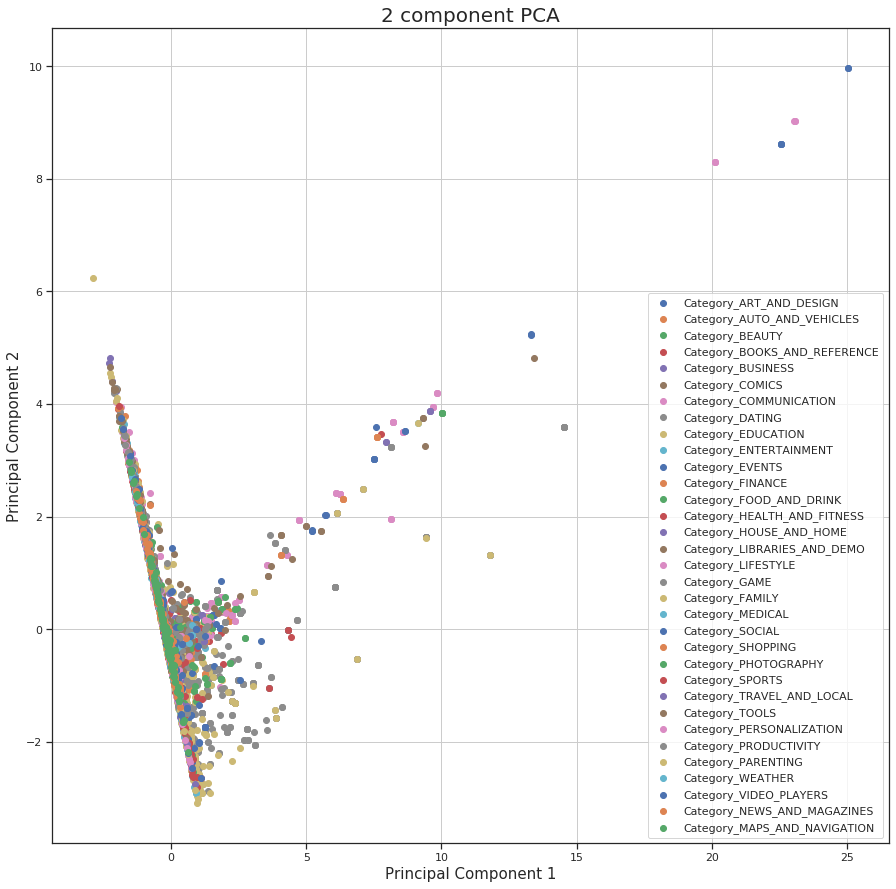

In [239]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = finalDf['target'].unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w',  'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'])
ax.legend(targets)
ax.grid()


Данные распложены близко к друг другу, практически неотделимы, что может говорить о недостаточном количстве размерности выборки для представления данных.

In [0]:
explained_variance_ratio = pca.explained_variance_ratio_ 
names = ['principal_component_1', 'principal_component_2']
for name, var_ratio in zip(names, explained_variance_ratio):
    print('{}: {}%'.format(name, var_ratio * 100))
print('Суммарная доля информации: {}%'.format(sum(explained_variance_ratio) * 100))

principal_component_1: 20.71963123620385%
principal_component_2: 14.330914342878415%
Суммарная доля информации: 35.05054557908227%


Потеря суммарной доли очень высокая, это говорит о том, что даже если попытаться визуализировать, то у нас полученная интерпретация данных будет не верной.

Рассмотрим для ещё 3 главные компоненты

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_сomponents = pca.fit_transform(X)

In [0]:
principal_df = pd.DataFrame(data = principal_сomponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_df.head(10)

,principal component 1,principal component 2,principal component 3
0,-0.241191,-0.041703,-0.048112
1,-0.353058,0.250095,-0.045390
2,0.043100,-0.566445,-0.089288
3,0.554370,-0.655021,-0.021517
4,-0.239841,-0.027244,-0.085043
5,-0.473912,0.485284,-0.212077
6,-0.270482,0.054395,0.011870
7,-0.012888,-0.537424,0.036527
8,-0.049137,-0.506467,-0.052345
9,-0.093686,-0.399669,-0.118876


In [0]:
explained_variance_ratio = pca.explained_variance_ratio_ 
names = ['principal_component_1', 'principal_component_2', 'principal_component_3']
for name, var_ratio in zip(names, explained_variance_ratio):
    print('{}: {}%'.format(name, var_ratio * 100))
print('Суммарная доля информации: {}%'.format(sum(explained_variance_ratio) * 100))

principal_component_1: 20.719631236203888%
principal_component_2: 14.330914342878422%
principal_component_3: 12.029962093484984%
Суммарная доля информации: 47.08050767256729%


Как можно заметить и для 3 главных компонент, с 132 фич к 3 получаем очень большую потерю. В силу этого попытка визулизировать в кординатах 3 компонент наши данные бессмысленна.

### Random Forest

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
err_train = np.mean(y_train != dtc.predict(X_train))
err_test  = np.mean(y_test  != dtc.predict(X_test))

print(err_train, err_test)

1.5974185715883132e-05 0.0025625256252562525


In [0]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

Таким образом все классификаторы и в том числе KNN показали примерно равные результаты для предоставленных данных. Это возможно, является следствием сбалансированностью и большим объемомо исходных данных. Поскольку показатели сравнительно очень хорошие для всех моделей, то целесобразнее выбрать метод ближайщего соседа для дальнейщего исследования. 

Далее попробуем рассмотреть более высокое количества компонент

In [0]:
def get_unexplained_variance_ratio_pca(components, X):
    unexplained_variance_ratio_list = []
    from sklearn.decomposition import PCA
    for comp in components:
        pca = PCA(n_components=comp)
        principal_сomponents = pca.fit_transform(X)
        explained_variance_ratio = pca.explained_variance_ratio_
        unexplained_variance_ratio_list.append(100 - sum(explained_variance_ratio) * 100)
    return  unexplained_variance_ratio_list

unexplained_variance_ratio_pca_list = get_unexplained_variance_ratio_pca(np.arange(2, 30), X)
unexplained_variance_ratio_pca_list

[64.94945442091773,
 52.91949232743285,
 41.43773785001718,
 31.769285845770085,
 27.516303384439198,
 24.61866976047679,
 22.901794026856876,
 21.5655454937134,
 20.266809964389154,
 19.21094844214241,
 18.241145347183178,
 17.295448209669914,
 16.365557481206537,
 15.485149256770598,
 14.614958535783117,
 13.79270512973244,
 12.971892263539061,
 12.207053501024916,
 11.451078643804976,
 10.725691636061697,
 10.01691649004097,
 9.340211228496486,
 8.723617548585196,
 8.128315148928877,
 7.5683238081777375,
 7.049018863676267,
 6.535378899411398,
 6.060779701931011]

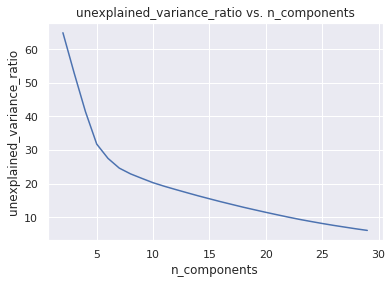

In [0]:
plt.title('unexplained_variance_ratio vs. n_components')
plt.xlabel('n_components')
plt.ylabel('unexplained_variance_ratio')
plt.plot(np.arange(2, 30), unexplained_variance_ratio_pca_list)

Выше представлен график падения уровня ошибки для обясненной вариции главными компонентами. Легко можно заметить, как крутой склон меняетяс на более полгую линию пр переходе с количества 6 к 7 главным компонентам.
По критерию ___крутого склона___ стоило бы выбрать 7 главных компонент для дальнейшей работы с данными. 

Доля ошибки обясненной вариации составит для 7 главных компонент составит ```27%```. Что на самом деле не является хорошим результатом, принято ориентироваться на результат ошибки менее 16%, что достигается при 14 главных компонентах. (16.36%)

In [0]:
unexplained_variance_ratio_pca_list[12]

16.365557481206537

In [0]:
def run_classifier(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    err_train = np.mean(y_train != classifier.predict(x_train))
    err_test  = np.mean(y_test  != classifier.predict(x_test))
    return err_train, err_test

def select_components(classifier):
    n_components = range(2, 113)
    train_err = []
    test_err = []
    for n in n_components:
        pca = PCA(n_components=n)
        pca.fit(X)
        X_nd_train = pca.transform(X_train)
        X_nd_test = pca.transform(X_test)
        trn_e, tst_e = run_classifier(classifier, X_nd_train, y_train, X_nd_test, y_test)
        train_err.append(trn_e)
        test_err.append(tst_e)
    return test_err, train_err

Наименьшая ошибка на тестовой выборке 0.003130940400313094 с 78 компонент
Наибольшая ошибка на тестовой выборке 0.04634909985463491 с 2 компонент
Наименьшая ошибка на тренировочной выборке 1.5974185715883132e-05 с 2 компонент
Наибольшая ошибка на тренировочной выборке 1.5974185715883132e-05 с 2 компонент


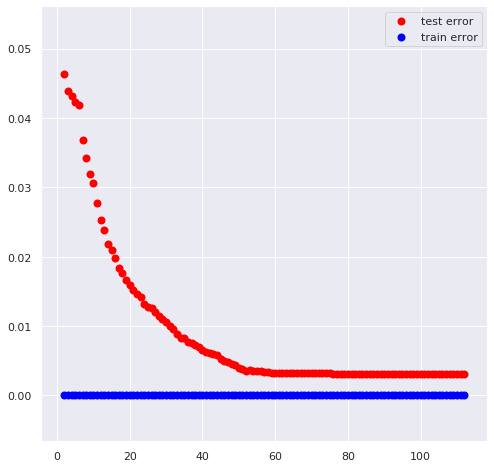

In [0]:
n_components = range(2, 113)
test_err, train_err = select_components(knn)

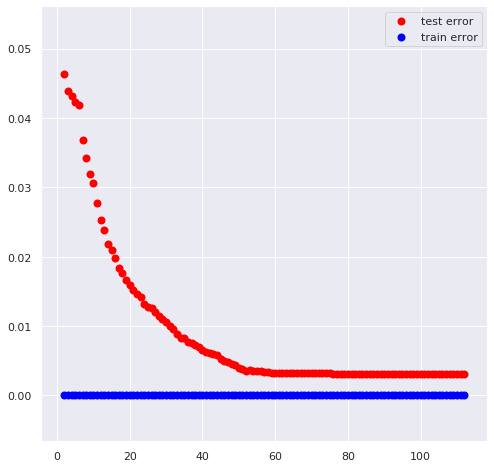

In [0]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
colors = ['red', 'blue']
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])

In [0]:
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Наименьшая ошибка на тестовой выборке {} с {} компонент".format(test_err[best_test_result]*100, best_test_result + 2))
print("Наибольшая ошибка на тестовой выборке {} с {} компонент".format(test_err[worst_test_result]*100, worst_test_result + 2))
print("Наименьшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[best_train_result]*100, best_train_result + 2))
print("Наибольшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[worst_train_result]*100, worst_train_result + 2))

Наименьшая ошибка на тестовой выборке 0.31309404003130936 с 78 компонент
Наибольшая ошибка на тестовой выборке 4.634909985463491 с 2 компонент
Наименьшая ошибка на тренировочной выборке 0.0015974185715883131 с 2 компонент
Наибольшая ошибка на тренировочной выборке 0.0015974185715883131 с 2 компонент


Как можно заметить ошибка на тренирочной выборке не меняется при любом количестве главных компонент. Однако можно четко наблюдать как ошибка падает на тестовой выборке с увеличением количества компонент, но при этом остается примерно на одном урвоне при количестве компонент свыше 56

Редуцировать количество компонент с 113 до 56 не целесобразно с точки зрения самой идеи применения PCA и с точки зрения затраты на вычислит рес.

Если сравнивать данное значение со значение суммарной доли объясняющей вариации для главных компонент, то целесобразно выбрать количество компонент равное 14 (ошибка для доли суммарной объясняющей вариации составляет ~(16.36%)). При 14 главных компонентах, ошибка на тесте для KNN составляет 2.18%

In [0]:
test_err[12]*100

2.1842036602184205

In [0]:
pca = PCA(n_components=14)
principal_сomponents = pca.fit_transform(X)

X_14d_train = pca.transform(X_train)
X_14d_test = pca.transform(X_test)

Доли объясненной дисперсии для каждой из компонент

In [251]:
explained_variance_ratio = pca.explained_variance_ratio_ 
names = [i+1 for i in range(14)]
for name, var_ratio in zip(names, explained_variance_ratio):
    print('{}: {}%'.format(name, var_ratio * 100))
print('Суммарная доля информации: {}%'.format(sum(explained_variance_ratio) * 100))

1: 20.719631236203707%
2: 14.33091434286394%
3: 12.029962093480082%
4: 11.481754477397336%
5: 9.668452004197153%
6: 4.252982418418153%
7: 2.897631484851095%
8: 1.7166305533725275%
9: 1.3357788748360246%
10: 1.2976226847185548%
11: 1.056297229806018%
12: 0.9848118659542626%
13: 0.9540268760421685%
14: 0.9065673863337095%
Суммарная доля информации: 83.63306352847472%


#MLP

Рассмотрим Multi Layer Perceptron Classifier из sklearn. В качестве функции активации будем использовать sigmoid, а в качестве оптимайзера - lbfgs. Для начала обучим классификатор, состоящий из одного слоя с 100 нейронами.

In [248]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),solver = 'lbfgs', 
                          activation = 'logistic', random_state = 144)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=144, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Проверяем качество классификатора

посчитаем ошибку на тестовой и тренировочной выборках

In [0]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [0]:
print('Train error: {}'.format(1- mlp_model.score(X_train, y_train)))
print('Test error: {}'.format(1 - mlp_model.score(X_test, y_test)))

Train error: 0.020822351080653667
Test error: 0.048277982779827755


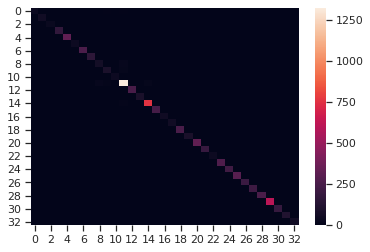

In [254]:
ax = sns.heatmap(cm_train)

Рассмотрим более эфективные метрики качества классификации

In [0]:
from sklearn.metrics import classification_report
print('Метрики для тренировочной выборки')
print(classification_report(y_train, y_train_pred))
print('\nМетрики для тестовой выборки')
print(classification_report(y_test, y_test_pred))

Метрики для тренировочной выборки
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00       172
           4       1.00      1.00      1.00       335
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00       262
           7       1.00      1.00      1.00       160
           8       0.76      0.72      0.74        99
           9       0.85      0.82      0.83       115
          10       1.00      1.00      1.00        44
          11       0.95      0.96      0.96      1386
          12       1.00      1.00      1.00       253
          13       1.00      1.00      1.00        91
          14       0.97      0.98      0.98       782
          15       1.00      1.00      1.00       242
          16       1.00      1.00      1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


В целом средние показатели очень высокие, однако можно заметить, что для некоторого малого количества классов значения довольно низкие, это обясняется маленьким объемом семплов для данного класса.

In [0]:
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_test_pred.argmax(axis=1), y_test.argmax(axis=1))
cm_train = confusion_matrix(y_train_pred.argmax(axis=1), y_train.argmax(axis=1))

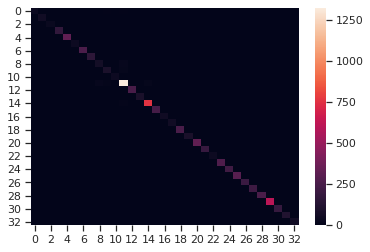

In [255]:
ax = sns.heatmap(cm_train)

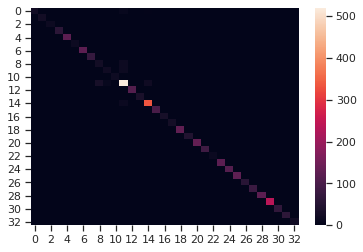

In [256]:
ax = sns.heatmap(cm_test)

### Двуслойный классификатор

Попробуем улучшить ситуацию с помощью добавления еще одного слоя

In [0]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, 100),solver = 'lbfgs', 
                          activation = 'logistic', random_state = 144)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Train error: {}'.format(1- mlp_model.score(X_train, y_train)))
print('Test error: {}'.format(1 - mlp_model.score(X_test, y_test)))

Train error: 0.017791249341064796
Test error: 0.058425584255842544


\# по моим
Значение ошибки на тренировочной и тестовой выборках не изменилось, а значит одного слоя вполне достаточно для наших экспериментов на данном этапе.

Подбор гиперпараметров. Подберем оптимальное значение параметра регуляризации alpha для однослойного

In [0]:
alpha_arr = np.logspace(-3, 2, 21)
test_err, train_err = [], [] 
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 144)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

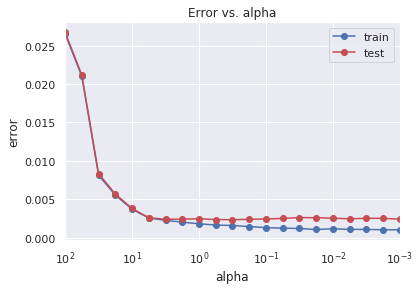

In [0]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Можно заметить, что ошибка на тестовой выборке практически не изменяется при увеличениии с 10_{-1} до 10_{-3} но при этом падает на тренировойчной начиная с 10_{1} ...
поэтому оптимально для данной модели выбрать ... или оставить как есть 10_{-3} как есть по дефолту



In [0]:
test_err

[0.0024134332252413434,
 0.0025066159752506617,
 0.0025159342502515934,
 0.0024507063252450704,
 0.0025252525252525255,
 0.002590480450259048,
 0.0026091170002609117,
 0.0024972977002497296,
 0.002432069775243207,
 0.002385478400238548,
 0.0023295687502329567,
 0.0023575235752357525,
 0.0024507063252450704,
 0.0024134332252413434,
 0.002385478400238548,
 0.00259979872525998,
 0.0038018562003801857,
 0.005674829475567483,
 0.008349174400834918,
 0.021189757352118976,
 0.02677140407767714]

In [0]:
train_err

[0.0010263414322454912,
 0.001014360792958579,
 0.0010702704429641698,
 0.001066276896535199,
 0.0011501413715435855,
 0.0010582898036772576,
 0.0011860832894043227,
 0.0012300123001230013,
 0.0012979025894155046,
 0.0014376767144294819,
 0.0015734572930144887,
 0.0016373540358780212,
 0.0018010894394658232,
 0.0020167409466302455,
 0.0022483666395105508,
 0.0025518761681123303,
 0.0036940304467979745,
 0.005535055350553505,
 0.008138847622242457,
 0.02100206066995735,
 0.02657705148480056]

In [0]:

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Min train error: {}'.format(min_train_err))
print('Min test error: {}'.format(min_test_err))
alpha_opt = alpha_arr[test_err == min_test_err][0]
print('Alpha optimum: {}'.format(alpha_opt))

Min train error: 0.001014360792958579
Min test error: 0.0023295687502329567
Alpha optimum: 0.31622776601683794


Попробуем поиграть с количеством слоев и узнаем насколько изменить качество нашего MLP классификатора

In [0]:
layer_sizes = [5, 10, 25, 50, 100, 150, 200, 250, 500, 750, 1000, 1500, 2000, 2500, 5000]
test_err, train_err = [], [] 
for size in layer_sizes:
    mlp_model = MLPClassifier(hidden_layer_sizes = tuple([size]), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 144)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Min train error: {}'.format(min_train_err))
print('Min test error: {}'.format(min_test_err))
opt_size_index = np.argmin(test_err)
print('size optimum: {}'.format(layer_sizes[opt_size_index]))

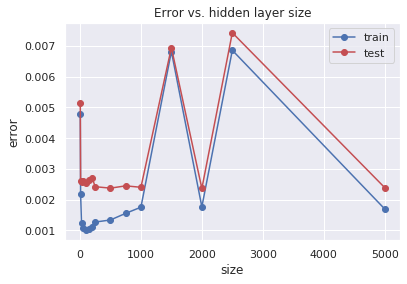

In [0]:
plt.plot(layer_sizes, train_err, 'b-o', label = 'train')
plt.plot(layer_sizes, test_err, 'r-o', label = 'test')
plt.title('Error vs. hidden layer size')
plt.xlabel('size')
plt.ylabel('error')
plt.legend()
pass

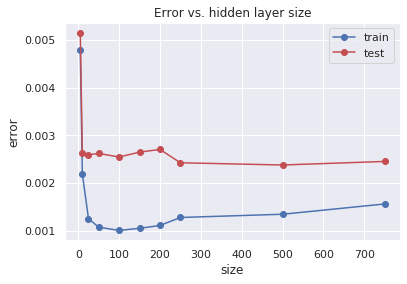

In [0]:
plt.plot(layer_sizes[:-5], train_err[:-5], 'b-o', label = 'train')
plt.plot(layer_sizes[:-5], test_err[:-5], 'r-o', label = 'test')
plt.title('Error vs. hidden layer size')
plt.xlabel('size')
plt.ylabel('error')
plt.legend()
pass

Можно заметить, что при увеличении количества слоев нас растут ошибки на тестовой выборке,  в том числе и на тренировочной. При увеличении количества слоев больше 100, ошибки увеличиваться, до него ошибки на тестовой и тренировочной падают. Можно заметить, что при количествах скрытых слоев больше 100 наступает переобучение.

Таким образом дефолтовое значение количества нейронов(100 из документации для для ```MLPClassifier```) со скрытом слое показало довольно хорошую ...


# MLP + PCA

Поскольку в предыдущей части классификаторы показали лучшие резульаты для KNN при n=1 и после PCA (уменьшение размерности, выделение первых 14м компонент)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
principal_сomponents = pca.fit_transform(X)

Применим к нашим входным данным выделение главных компонент перед обучением классификатора.

In [0]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),solver = 'lbfgs', 
                          activation = 'logistic', random_state = 144)
print("До применения метода главных компонент")
mlp_model.fit(X_train, y_train)

err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test  = np.mean(y_test  != mlp_model.predict(X_test))

print("Ошибка на тренировочной выбрке: {}".format(err_train))
print("Ошибка на тестовой выборке: {}".format(err_test))

print("После")
mlp_model.fit(X_14d_train, y_train)

err_14d_train = np.mean(y_train != mlp_model.predict(X_14d_train))
err_14d_test  = np.mean(y_test  != mlp_model.predict(X_14d_test))

print("Ошибка на тренировочной выбрке: {}".format(err_14d_train))
print("Ошибка на тестовой выборке: {}".format(err_14d_test))

До применения метода главных компонент
Ошибка на тренировочной выбрке: 0.0010023801536716665
Ошибка на тестовой выборке: 0.002543889075254389
После
Ошибка на тренировочной выбрке: 0.006960751425696075
Ошибка на тестовой выборке: 0.008591449550859146


Можно заметить как вырослы ошибки как на тренировочной, так и на тестовой выборках. 

Проверяем качество классификатора

Посмотрим на метрики качества после применения PCA: precision, recall, accuracy, f1-score




In [0]:
mlp_model.fit(X_14d_train, y_train)
y_pca_train = mlp_model.predict(X_14d_train)
y_pca_test = mlp_model.predict(X_14d_test)
print('Метрики для тренировочной выборки')
print(classification_report(y_train, y_pca_train))
print('\nМетрики для тестовой выборки')
print(classification_report(y_test, y_pca_test))

Метрики для тренировочной выборки
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.50      0.02      0.03        60
           2       0.00      0.00      0.00        36
           3       0.99      0.99      0.99       172
           4       1.00      1.00      1.00       335
           5       1.00      0.14      0.24        43
           6       1.00      1.00      1.00       262
           7       1.00      0.97      0.99       160
           8       0.74      0.42      0.54        99
           9       0.76      0.65      0.70       115
          10       1.00      0.02      0.04        44
          11       0.81      0.78      0.79      1386
          12       1.00      1.00      1.00       253
          13       1.00      0.02      0.04        91
          14       0.82      0.74      0.78       782
          15       1.00      1.00      1.00       242
          16       0.00      0.00      0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


Построим матрицу рассогласования

In [0]:
cm_test = confusion_matrix(y_pca_test.argmax(axis=1), y_test.argmax(axis=1))
cm_train = confusion_matrix(y_pca_train.argmax(axis=1), y_train.argmax(axis=1))

In [0]:
with np.printoptions(threshold=np.inf):
    print(cm_test)

[[ 20  23  15   0   0  13   0   5   7   4  20 101   1  34  66   1  31  16
    2  35   0   2  12   2   3   0   2   1   1   0   1  51  19]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  59   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 125   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0 125   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  69   0   0

In [0]:
import seaborn as sns; sns.set()

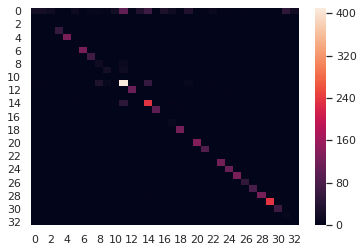

In [0]:
# Матрица рассогласования для тренировочной выборки
ax = sns.heatmap(cm_test)

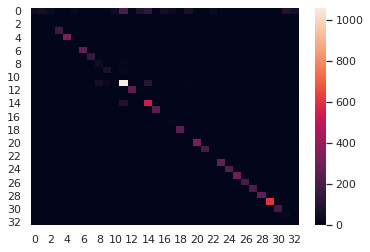

In [0]:
# Матрица рассогласования для тестовой выборки
ax = sns.heatmap(cm_train)

Как показали предыдущие эксперименты, рациональнее выбрать число главных компонент 14. Посмотрим на поведение модели MLP в зависимости от количества главных компонент. Максимальное количество компонент установим 20.  

In [0]:
def run_classifier(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    err_train = np.mean(y_train != classifier.predict(x_train))
    err_test  = np.mean(y_test  != classifier.predict(x_test))
    return err_train, err_test

def select_components(classifier):
    n_components = range(2, 20)
    train_err = []
    test_err = []
    for n in n_components:
        pca = PCA(n_components=n)
        pca.fit(X)
        X_nd_train = pca.transform(X_train)
        X_nd_test = pca.transform(X_test)
        trn_e, tst_e = run_classifier(classifier, X_nd_train, y_train, X_nd_test, y_test)
        train_err.append(trn_e)
        test_err.append(tst_e)
    return test_err, train_err

n_components = range(2, 20)
test_err, train_err = select_components(mlp_model)

Наименьшая ошибка на тестовой выборке 0.693279660069328 с 19 компонент
Наибольшая ошибка на тестовой выборке 3.031234857803123 с 4 компонент
Наименьшая ошибка на тренировочной выборке 0.5271481286241434 с 19 компонент
Наибольшая ошибка на тренировочной выборке 3.02351400137378 с 3 компонент


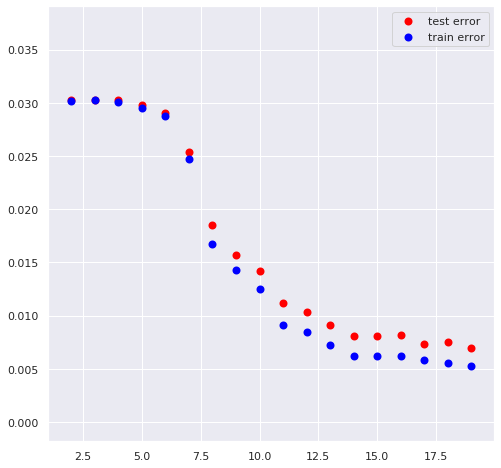

In [0]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
colors = ['red', 'blue']
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Наименьшая ошибка на тестовой выборке {} с {} компонент".format(test_err[best_test_result]*100, best_test_result + 2))
print("Наибольшая ошибка на тестовой выборке {} с {} компонент".format(test_err[worst_test_result]*100, worst_test_result + 2))
print("Наименьшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[best_train_result]*100, best_train_result + 2))
print("Наибольшая ошибка на тренировочной выборке {} с {} компонент".format(train_err[worst_train_result]*100, worst_train_result + 2))

Можно заметить, что с увеличением количества главных компонент ошибки на тестовых и тренировочных наборах падают, правтически монотонно в указанном диапозоне.

Рассмотрим показатели ошибки для двухслойного MLP с количеством главных компонент 14.


In [0]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100, 100),solver = 'lbfgs', 
                          activation = 'logistic', random_state = 144)
mlp_model.fit(X_14d_train, y_train)
print('Train error: {}'.format(1- mlp_model.score(X_14d_train, y_train)))
print('Test error: {}'.format(1 - mlp_model.score(X_14d_test, y_test)))

Train error: 0.1871375856615709
Test error: 0.22908979089790893


Можно заметить, что для двуслойного MLP, с предобработкой данных PCA (14 главн. компонент), наблюдается резкий рост уровня ошибки как на тестовых, так и тренировочных наборах. 

## Выводы
Таким образом в результате экспериментов было установлено, что для данного набора данных практически все применяемые классификаторы показали приблизительно сравнительно очень хорошие результаты. Возможно, это обясняется хорошей сбалансированностью данных и их большим объемом. Регуяризяция PCA не сильно улучшило ситуацию, а где-то даже показатели ошибок увеличелись. Применяемые модели 1-2 слойные модели MLP также показали примерно схожие результаты, при этом, стоит отметить, что модели, состоящие из одного слоя скрытого сравнительно оказались лучше, чем MLP с двумя скрытми слоями.

Возможно, применяя PCA регуляризацию с большим кол-вом главных компонент, и поискав оптимальное сочетание параметра альфа и итераций,  можно было улучшить показатели модели с двумя скрытыми слоями относительного модели с одним. 
